## This workbook goes through several machine learning algorithms with a single dataset


In [28]:
# Load useful packages
import seaborn as sns
from pandas import Series,DataFrame
import pandas as pd
import matplotlib as mpl
import numpy as np
import random as rnd

import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')
alt.data_transformers.enable('json')
print(alt.renderers.active)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import svm

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

from scipy import sparse
import io


notebook


In [29]:
# load the dataset
dtype = {
                    'class_label' : 'category', # 0 = background; 1 = signal
                    'lepton 1 pT' : 'float', 
                    'lepton 1 eta': 'float', 
                    'lepton 1 phi': 'float', 
                    'lepton 2 pT' : 'float', 
                    'lepton 2 eta': 'float', 
                    'lepton 2 phi': 'float', 
                    'missing energy magnitude': 'float', 
                    'missing energy phi'      : 'float', 
                    'MET_rel'     : 'float', 
                    'axial MET'   : 'float', 
                    'M_R'         : 'float', 
                    'M_TR_2'      : 'float', 
                    'R'           : 'float', 
                    'MT2'         : 'float', 
                    'S_R'         : 'float', 
                    'M_Delta_R'   : 'float', 
                    'dPhi_r_b'    : 'float', 
                    'cos(theta_r1)': 'float', 
}
raw_data = pd.read_csv('SUSY.csv',nrows=500000,header=None,dtype=dtype)
all_vars = [key for key in dtype.keys()]
df = raw_data
df.columns = all_vars


In [30]:
# have to fix class_label to category with a little bit of work. 
df.class_label = df.class_label.astype('int').astype('category')
df.dtypes

class_label                 category
lepton 1 pT                  float64
lepton 1 eta                 float64
lepton 1 phi                 float64
lepton 2 pT                  float64
lepton 2 eta                 float64
lepton 2 phi                 float64
missing energy magnitude     float64
missing energy phi           float64
MET_rel                      float64
axial MET                    float64
M_R                          float64
M_TR_2                       float64
R                            float64
MT2                          float64
S_R                          float64
M_Delta_R                    float64
dPhi_r_b                     float64
cos(theta_r1)                float64
dtype: object

In [31]:
# lepton 1 pT, lepton 1 eta, lepton 1 phi, lepton 2 pT, lepton 2 eta, 
# lepton 2 phi, missing energy magnitude, missing energy phi, MET_rel, axial MET, 
# M_R, M_TR_2, R, MT2, S_R, M_Delta_R, dPhi_r_b, cos(theta_r1).
df.columns = all_vars
df.head(5)

,class_label,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


In [32]:
df.describe()

,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,5.000000e+05
mean,1.000488,0.000360,-0.001996,0.999263,0.000932,-0.000320,1.001159,0.000172,1.001566e+00,0.003071,0.999661,0.999876,1.000526,1.000240,0.999196,1.000231,0.999072,2.252736e-01
std,0.683726,1.002148,1.001985,0.652296,1.003127,1.001897,0.873069,1.001655,8.890945e-01,1.002683,0.626232,0.581229,0.470721,0.858872,0.618073,0.623397,0.436106,1.970530e-01
min,0.255507,-2.102860,-1.734772,0.428590,-2.059306,-1.734202,0.000709,-1.727112,9.238942e-07,-11.720411,0.267307,0.009538,0.010751,0.000000,0.027341,0.004456,0.000008,2.388670e-07
25%,0.561989,-0.756708,-0.869564,0.597262,-0.769916,-0.869845,0.479640,-0.867332,3.698151e-01,-0.491095,0.588007,0.622657,0.651171,0.169512,0.597973,0.514191,0.687454,6.940895e-02
50%,0.791944,0.000382,-0.001582,0.799874,0.000629,0.000224,0.774435,-0.008317,8.034310e-01,-0.079708,0.827889,0.878434,0.935593,0.901239,0.834630,0.913417,1.094021,1.678525e-01
75%,1.207008,0.757369,0.865386,1.162750,0.770778,0.868095,1.208382,0.869558,1.375736e+00,0.351263,1.210989,1.220595,1.283571,1.613489,1.207715,1.385514,1.368592,3.306832e-01
max,16.632372,2.101588,1.734839,26.110743,2.059712,1.734686,17.055161,1.740683,1.924237e+01,17.311342,16.918142,13.200295,6.731210,12.791473,16.989283,10.329440,1.591660,1.000000e+00


In [33]:
df.loc[raw_data.class_label==1].describe()

,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
count,229245.000000,229245.000000,229245.000000,229245.000000,229245.000000,229245.000000,229245.000000,229245.000000,2.292450e+05,229245.000000,229245.000000,229245.000000,229245.000000,229245.000000,229245.000000,229245.000000,229245.000000,2.292450e+05
mean,1.291078,0.000824,-0.001524,1.138668,0.002487,0.000049,1.418381,-0.000470,1.275169e+00,0.089314,1.183651,1.268858,1.056352,1.074694,1.175023,1.186022,1.014617,2.824168e-01
std,0.798660,0.866153,1.001750,0.742778,0.889928,1.002050,1.093699,1.001191,1.109681e+00,1.382238,0.661247,0.682811,0.488891,0.982803,0.648975,0.701388,0.429362,2.193628e-01
min,0.256258,-2.102709,-1.734766,0.428599,-2.059249,-1.734202,0.001079,-1.727112,9.238942e-07,-11.720411,0.273004,0.013508,0.011089,0.000000,0.066475,0.004456,0.000008,3.520310e-07
25%,0.752763,-0.621768,-0.866943,0.647776,-0.644961,-0.868849,0.706691,-0.869269,4.525214e-01,-0.692693,0.741380,0.815968,0.700749,0.000000,0.749280,0.636591,0.719532,1.003560e-01
50%,1.087717,0.000992,-0.000516,0.919838,0.002455,0.001179,1.143023,-0.010920,1.018267e+00,-0.101189,1.020197,1.148998,0.991350,0.935598,1.019772,1.099785,1.112073,2.313350e-01
75%,1.592187,0.621471,0.865386,1.373770,0.650765,0.868991,1.786322,0.869546,1.790153e+00,0.637087,1.434236,1.565448,1.338987,1.808461,1.418881,1.643243,1.374331,4.233350e-01
max,12.620587,2.101378,1.734800,17.006506,2.059712,1.734686,17.055161,1.740683,1.924237e+01,17.311342,11.983890,13.200295,6.731210,12.791473,12.079610,10.329440,1.591660,1.000000e+00


In [34]:
df.loc[raw_data.class_label==0].describe()

,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
count,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,2.707550e+05
mean,0.754449,-0.000032,-0.002395,0.881230,-0.000384,-0.000633,0.647902,0.000716,0.769910,-0.069950,0.843879,0.772132,0.953259,0.937201,0.850326,0.842924,0.985909,1.768911e-01
std,0.437260,1.104278,1.002185,0.536870,1.089818,1.001770,0.350245,1.002049,0.547848,0.476780,0.548698,0.340564,0.449381,0.731947,0.548203,0.497165,0.441308,1.608061e-01
min,0.255507,-2.102860,-1.734772,0.428590,-2.059306,-1.734197,0.000709,-1.727112,0.000004,-7.213019,0.267307,0.009538,0.010751,0.000000,0.027341,0.004464,0.000013,2.388670e-07
25%,0.495134,-0.900951,-0.872031,0.569711,-0.896315,-0.870555,0.387817,-0.865679,0.320051,-0.383161,0.516055,0.540595,0.613425,0.276491,0.527979,0.439358,0.660868,5.377190e-02
50%,0.640639,-0.000218,-0.002472,0.729805,-0.001793,-0.000360,0.604479,-0.006077,0.683421,-0.070433,0.687854,0.734455,0.887760,0.880883,0.698357,0.789033,1.077748,1.288990e-01
75%,0.868306,0.900016,0.865367,0.999743,0.895798,0.867428,0.857946,0.869560,1.125804,0.245289,0.982888,0.953805,1.232969,1.489833,0.988811,1.193136,1.363542,2.543590e-01
max,16.632372,2.101588,1.734839,26.110743,2.059712,1.734681,7.515224,1.740683,7.849314,3.093575,16.918142,10.126897,3.707803,4.087075,16.989283,6.022603,1.591660,9.797930e-01


In [35]:
df.shape

(500000, 19)

### Create scaled datasets

In [46]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)
print('Scaler Means:',scaler.mean_)
print('Scaler Sigs: ',scaler.scale_)
type(scaled_array)
df_scaled = pd.DataFrame(scaled_array,columns=df.columns)
df_scaled.describe()

Scaler Means: [ 4.58e-01  1.00e+00  3.60e-04 -2.00e-03  9.99e-01  9.32e-04 -3.20e-04
  1.00e+00  1.72e-04  1.00e+00  3.07e-03  1.00e+00  1.00e+00  1.00e+00
  1.00e+00  9.99e-01  1.00e+00  9.99e-01  2.25e-01]
Scaler Sigs:  [0.5  0.68 1.   1.   0.65 1.   1.   0.87 1.   0.89 1.   0.63 0.58 0.47
 0.86 0.62 0.62 0.44 0.2 ]


,class_label,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
count,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05
mean,-1.166711e-17,-1.625011e-16,4.119372e-18,2.155964e-17,-3.552714e-18,7.261747e-18,1.335820e-18,-1.298286e-16,-3.127099e-17,1.613856e-16,2.444267e-18,-1.148805e-16,-1.174350e-16,2.247091e-17,-2.999085e-16,-1.302425e-16,-4.606093e-17,7.631211e-16,-5.263985e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-9.201565e-01,-1.089591e+00,-2.098713e+00,-1.729345e+00,-8.748680e-01,-2.053817e+00,-1.730600e+00,-1.145902e+00,-1.724431e+00,-1.126501e+00,-1.169212e+01,-1.169461e+00,-1.703870e+00,-2.102681e+00,-1.164599e+00,-1.572396e+00,-1.597339e+00,-2.290876e+00,-1.143213e+00
25%,-9.201565e-01,-6.413380e-01,-7.554465e-01,-8.658506e-01,-6.162855e-01,-7.684462e-01,-8.678795e-01,-5.973405e-01,-8.660714e-01,-7.105562e-01,-4.928438e-01,-6.573514e-01,-6.490034e-01,-7.421727e-01,-9.672334e-01,-6.491528e-01,-7.796643e-01,-7.145462e-01,-7.909787e-01
50%,-9.201565e-01,-3.050108e-01,2.148909e-05,4.128077e-04,-3.056718e-01,-3.022311e-04,5.430170e-04,-2.596869e-01,-8.474768e-03,-2.228507e-01,-8.255772e-02,-2.742949e-01,-2.089398e-01,-1.379449e-01,-1.152689e-01,-2.662582e-01,-1.392592e-01,2.177220e-01,-2.913993e-01
75%,1.086772e+00,3.020512e-01,7.553863e-01,8.656650e-01,2.506332e-01,7.674463e-01,8.667713e-01,2.373509e-01,8.679505e-01,4.208437e-01,3.472600e-01,3.374606e-01,3.797451e-01,6.013014e-01,7.140181e-01,3.373683e-01,6.180383e-01,8.473189e-01,5.349311e-01
max,1.086772e+00,2.286280e+01,2.096725e+00,1.733396e+00,3.849710e+01,2.052364e+00,1.731722e+00,1.838804e+01,1.737637e+00,2.051618e+01,1.726197e+01,2.541947e+01,2.099075e+01,1.217428e+01,1.372876e+01,2.587088e+01,1.496513e+01,1.358819e+00,3.931567e+00


/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered 

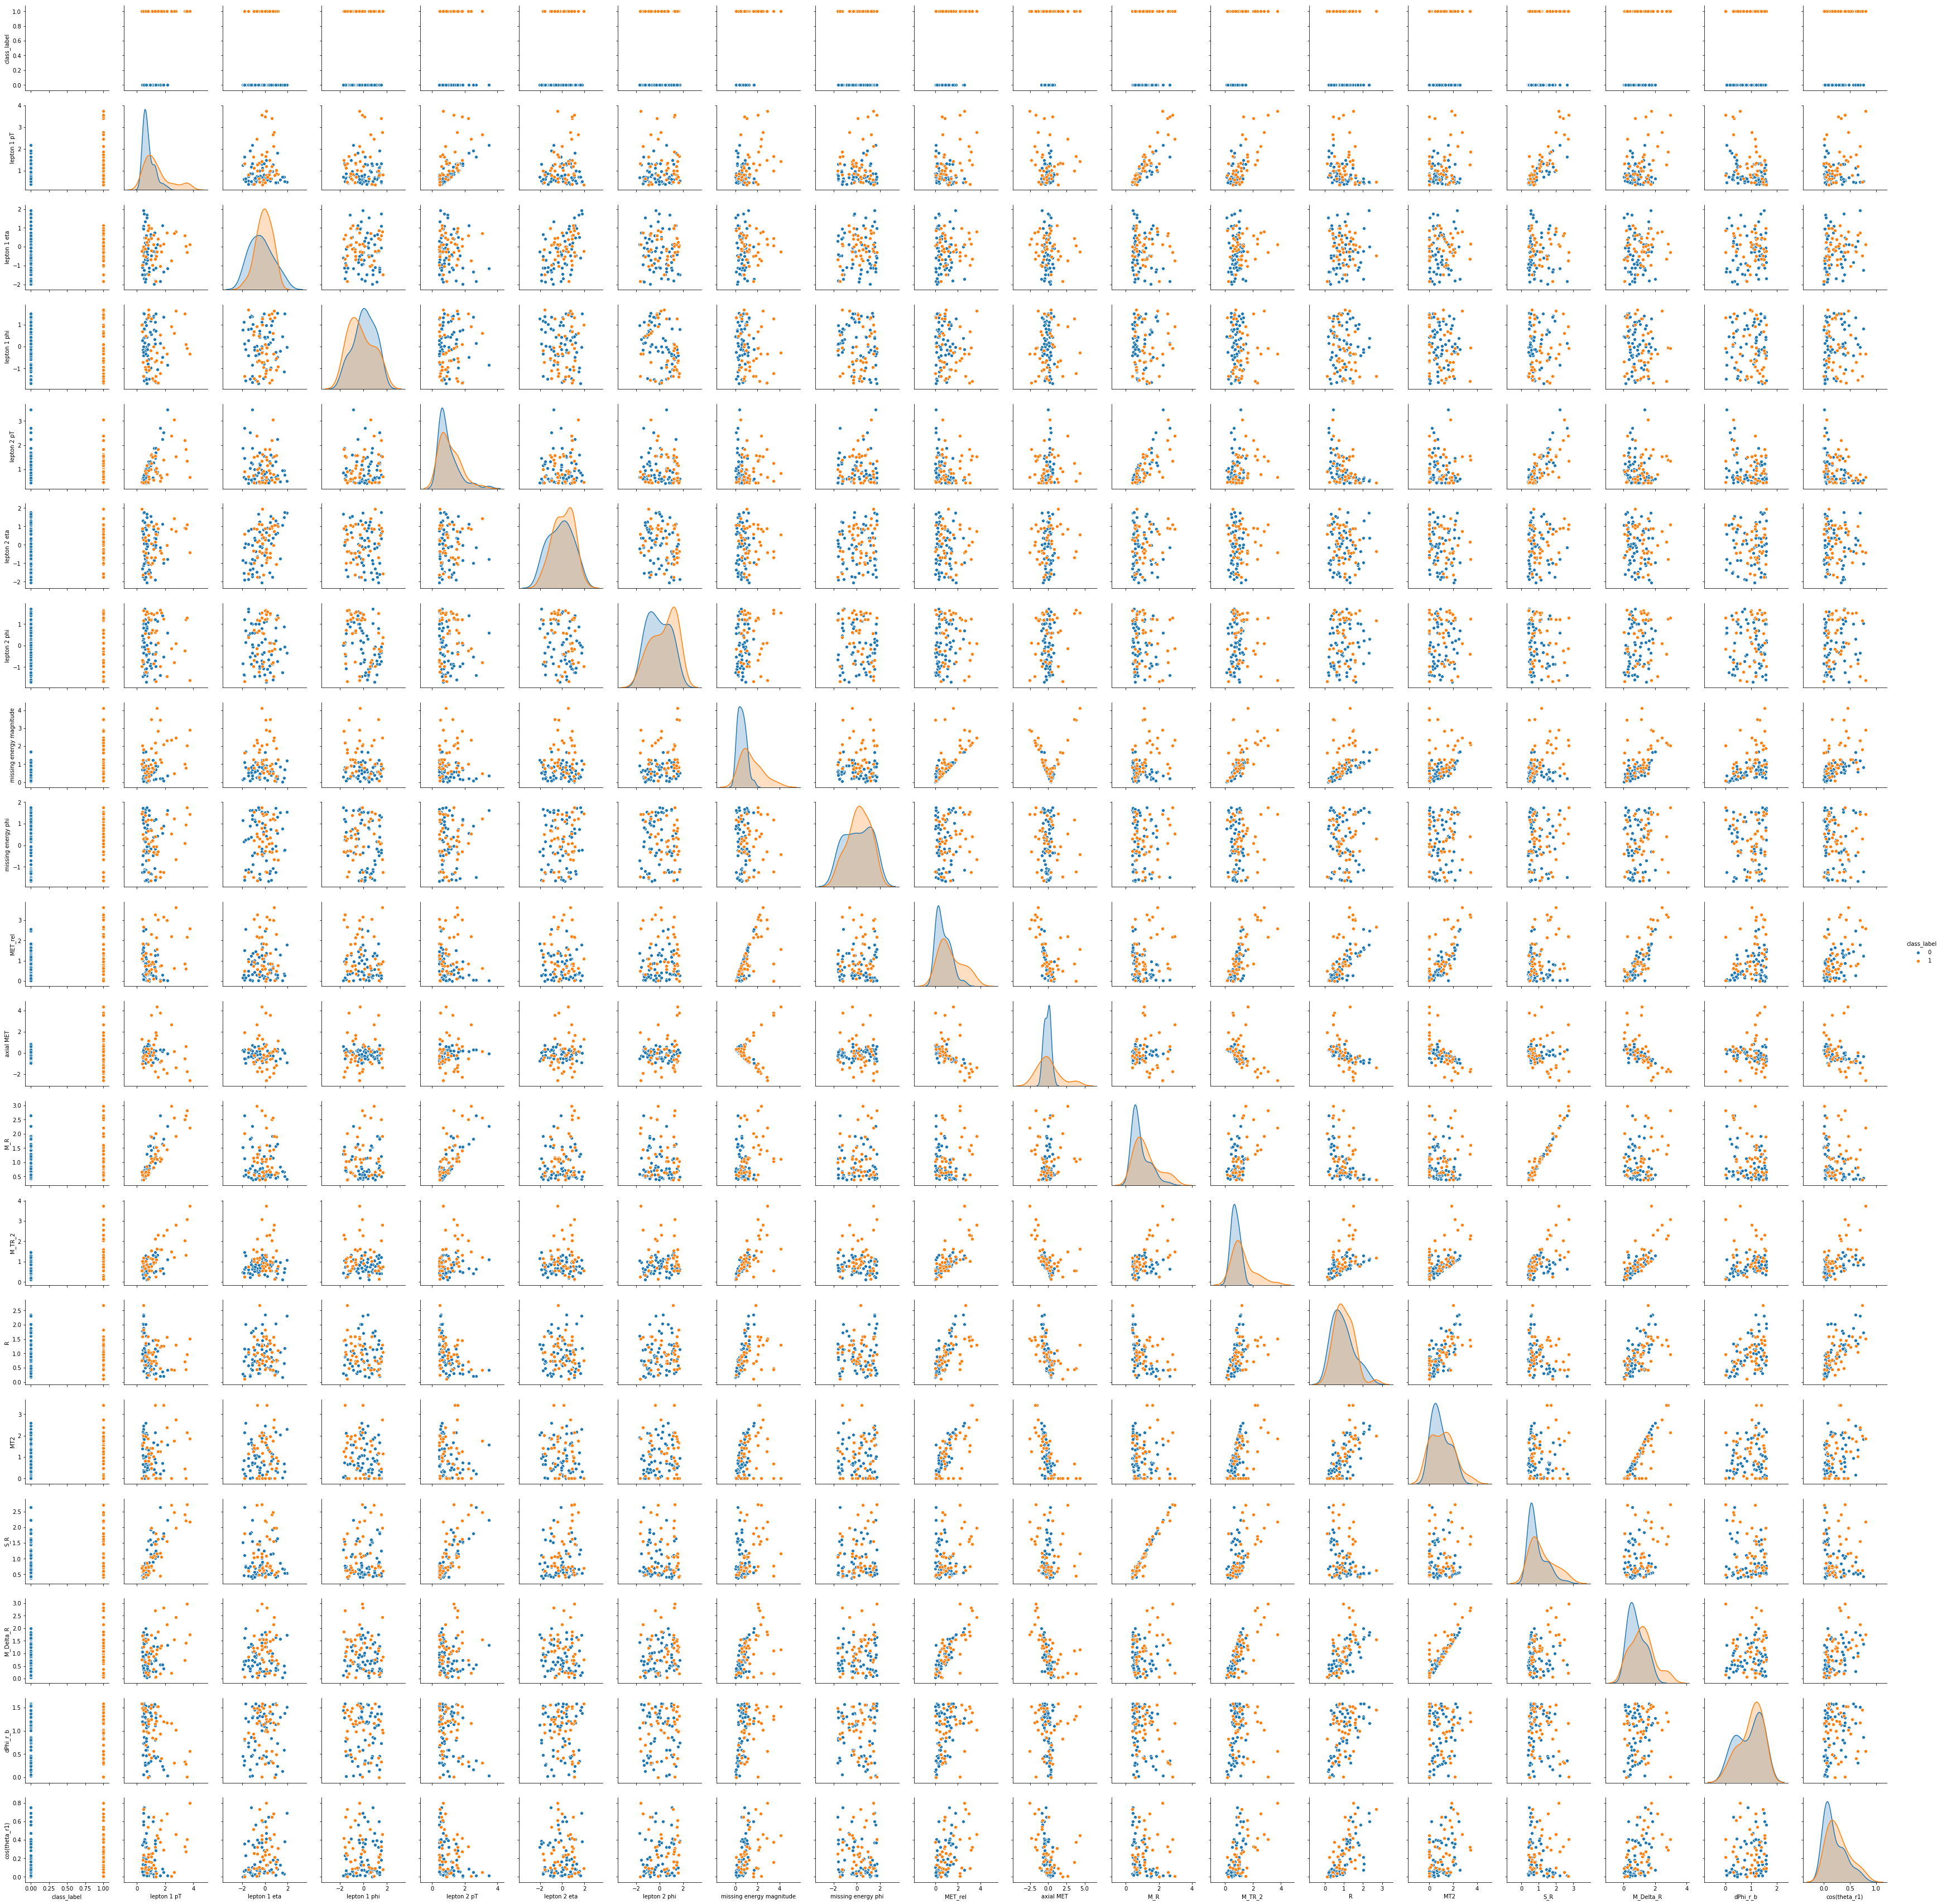

In [37]:
# A little EDA to see what sorts of feature engineering is already present
# We know already that lepton 1 pT to missing energy phi are "low level" 
# and the rest are high level; perhaps derived simply 

# sns.pairplot(raw_data.loc[all_vars[1:],range(1000),], hue = 'class_label')
sns.pairplot(df.loc[range(100),], hue = 'class_label')

There are some correlations; we might want to remove MT2 for its colinearity to M_Delta_R, for example or S_R and M_R or at least watch for those terms.  

## MODELS: separate test and training sets





In [48]:
target_variable = 'class_label'
y = df[target_variable]
X = df.drop(columns=target_variable, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
# for a bunch of long-running analyses, we want smaller data sets, so:
X_train_little = X_train[:50000]
y_train_little = y_train[:50000]

y_scaled = df_scaled[target_variable]
X_scaled = df_scaled.drop(columns=target_variable, axis=1)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size = 0.30)
# for a bunch of long-running analyses, we want smaller data sets, so:
X_train_scaled_little = X_train_scaled[:50000]
y_train_scaled_little = y_train_scaled[:50000]

## Just for fun, create a PCA version of this data set


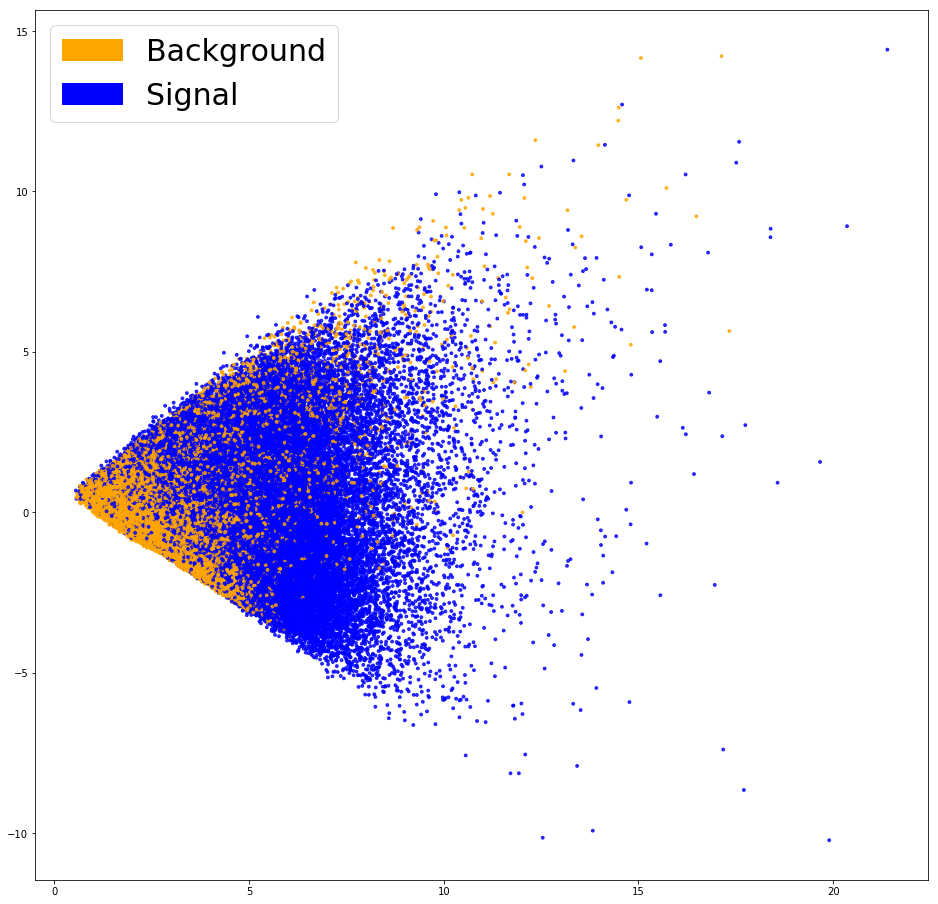

In [39]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Background')
            green_patch = mpatches.Patch(color='blue', label='Signal')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train, y_train)
plt.show()

## MODEL 1: LOGISTIC REGRESSION


In [40]:
%%time
# This took 11 minutes for 2C's and L2 / L1 reg.  Got indistinguishable results. 
# The issue is L1 regularization, so we can do that really sparsely if at all.
# This was also only with 1/10 of the data rows.  
param_grid = [
    {'penalty': ['l2', 'l1'],
     'C': [0.001, 1,1000]}
]
# [0.001, 0.01, 0.1, 1, 10, 100, 1000]
logreg_classifier = LogisticRegression()

grid_search = GridSearchCV(logreg_classifier,
                           param_grid,
                           cv = 5,
                           n_jobs = -1)

# This takes a long time to run so it's commented out.
# grid_search.fit(X_train, y_train)
# cvres = grid_search.cv_results_
# zipped = zip(cvres["mean_test_score"], cvres["params"])
# for mean_score, params in zipped:
#     print(mean_score, params)


CPU times: user 45 µs, sys: 1 µs, total: 46 µs
Wall time: 53.2 µs


Cool. So the cross-validation does not do too much; pick and save a model and find the confusion matrix for that model in the test sample.  Also make a pretty plot.  And do an ROC curve.  Those are all really good habits!



In [41]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Confusion matrix, without normalization
[[71611  9645]
 [22012 46732]]
Normalized confusion matrix
[[0.88 0.12]
 [0.32 0.68]]


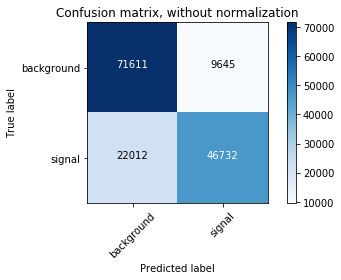

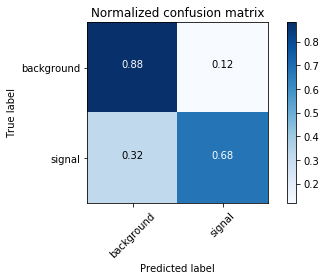

In [42]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: 
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Predict in test sample:
y_pred = model.fit(X_train, y_train).predict(X_test)
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

#
class_names = ['background','signal']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()



#### ROC curve


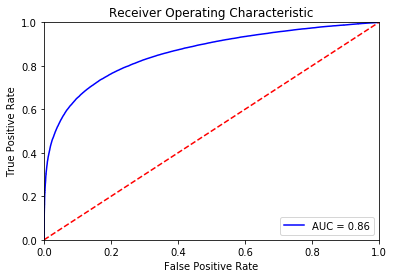

In [43]:
# calculate the fpr and tpr for all thresholds of the classification
# taken from https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
def plot_roc_curve(model,X_test,y_test):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

plot_roc_curve(model,X_test,y_test)

#### Playing with logistic regression 1: print out stats on features

In [44]:
# Turns out we can get a nice report
import statsmodels.api as sm
logit_model=sm.Logit(y_train_little,X_train_little)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.462227
         Iterations 8
                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.329     
Dependent Variable:     class_label        AIC:                46258.7281
Date:                   2019-02-01 14:20   BIC:                46417.4841
No. Observations:       50000              Log-Likelihood:     -23111.   
Df Model:               17                 LL-Null:            -34460.   
Df Residuals:           49982              LLR p-value:        0.0000    
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         8.0000                                           
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
lepton 1 pT               2.1998   0.083

How totally cool!  Domain knowledge helps interpret this... of course the angles (phi) don't make a difference (low z score).  One might consider some more feature engineering like interaction terms (phi1-phi2... would that work?) to improve the model.  Then again, perhaps the higher level features incorporate that information already. 

Anyway, maybe for a another day...


#### Playing with logistic regression 2: try fit with rescaled data... more efficient?

#### Playing with logistic regression 3: print out stats on fits with rescaled data

#### Playing with logistic regression 4: translate from rescaled data to unscaled data

#### Playing with logistic regression 5: 

### MODEL 2: RANDOM FOREST


In [17]:
%%time
# Instantiate model with 500 decision trees
rf = RandomForestClassifier(n_estimators = 500, random_state = 42)

# this take a long time even on the 10% sample.  use the _little subsample
# time is ~ 2 minute with 50000 samples. 
# Train the model on training data
rf.fit(X_train_little, y_train_little);

CPU times: user 1min 53s, sys: 135 ms, total: 1min 53s
Wall time: 1min 52s


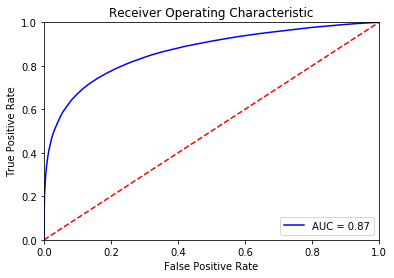

In [18]:
plot_roc_curve(rf,X_test,y_test)


#### I should probably do a cross-validation grid search here, but it's a lot like the one for logistic...

### MODEL 3: NAIVE BAYES:

In [19]:
%%time
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train)


CPU times: user 463 ms, sys: 44 ms, total: 507 ms
Wall time: 129 ms


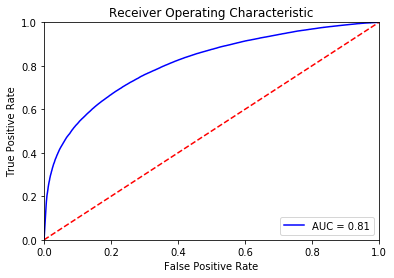

In [20]:
plot_roc_curve(model,X_test,y_test)

### MODEL 4: Xgboost

In [21]:
%%time
#model = XGBClassifier()
# This is a bit of a cheat!  I'm using the tuned hyperparameters from below 
model = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 6, subsample = 0.8)   
## 'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'subsample': 0.8
model.fit(X_train_little, y_train_little)

CPU times: user 5.78 s, sys: 73 µs, total: 5.78 s
Wall time: 5.65 s


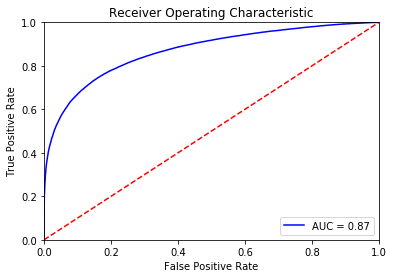

In [22]:
plot_roc_curve(model,X_test,y_test)

#### Examine Feature Importance in XGBoost

In [ ]:
from xgboost import plot_importance
# plot feature importance
plot_importance(model)
pyplot.show()

In [23]:
# Plotting routine for algorithm convergence
def plt_error(model):
    model_metric = list(model.evals_result()['validation_0'].keys())[0]
    model_error  = list(model.evals_result()['validation_0'].keys())[1]
    n = len(model.evals_result()['validation_0'][model_metric])
    plt.title('Classification Error')
    plt.plot(range(n), model.evals_result()['validation_0'][model_metric], 'b', label = 'Train ' + model_metric)
    plt.plot(range(n), model.evals_result()['validation_1'][model_metric], 'y', label = 'Test ' + model_metric)
    plt.plot(range(n), model.evals_result()['validation_0'][model_error], 'b', label = 'Train ' + model_error)
    plt.plot(range(n), model.evals_result()['validation_1'][model_error], 'y', label = 'Test ' + model_error)
    plt.legend(loc = 'right')
    plt.xlim([0, n])
    plt.ylim([0, 1])
    plt.ylabel(model_error + ' / ' + model_metric)
    plt.xlabel('Estimators')
    plt.show()

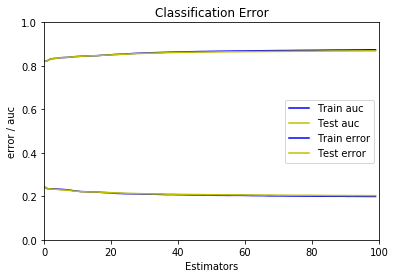

In [24]:
#### XGBoost playing around
eval_set = [(X_train_little, y_train_little), (X_test, y_test)]
eval_metric = ["auc","error"]
#model = XGBClassifier()
model = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 6, subsample = 0.8)   
model.fit(X_train_little, y_train_little,eval_metric=eval_metric,eval_set=eval_set,verbose=False)
plt_error(model)


#### XGboost wins again!

So try hyperparameter tuning by parameter and then deploy.

In [25]:
%%time
# suggestions from https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e  
param_grid = [
    {'max_depth': [3, 6],
     'learning_rate': [0.01, 0.1],
     'subsample': [0.8, 1.0],
     'colsample_bytree': [0.3, 0.8]
    }
]
model = XGBClassifier()
grid_search = GridSearchCV(model,
                           param_grid,
                           cv = 5,
                           n_jobs = -1)

# This takes a long time to run so it's commented out.
# grid_search.fit(X_train_little, y_train_little)
# cvres = grid_search.cv_results_
# zipped = zip(cvres["mean_test_score"], cvres["params"])
# for mean_score, params in zipped:
#     print(mean_score, params)
    
# and the winner is: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'subsample': 0.8}


CPU times: user 465 µs, sys: 4 µs, total: 469 µs
Wall time: 353 µs


### MODEL 5: SVM:

In [26]:
%%time
model = svm.SVC(kernel='linear', C=1, gamma=1, probability=True) # Probability true necessary for the ROC plot
model.fit(X_train_little, y_train_little)

# https://towardsdatascience.com/support-vector-machine-vs-logistic-regression-94cc2975433f
# this article suggests that you use a gaussian kernel when you have a large number of 
# features so we can try 


CPU times: user 10min 52s, sys: 144 ms, total: 10min 53s
Wall time: 10min 53s


In [27]:
print(model.score(X_test, y_test))


0.7875466666666666


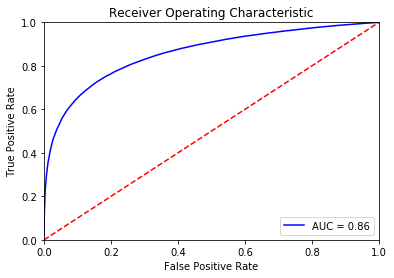

In [28]:
plot_roc_curve(model,X_test,y_test)


0.7823133333333333


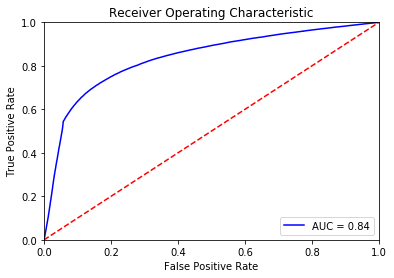

CPU times: user 57min 56s, sys: 296 ms, total: 57min 57s
Wall time: 57min 57s


In [29]:
%%time
model = svm.SVC(kernel='rbf', C=1, gamma=1, probability=True) # Probability true necessary for the ROC plot
# model.fit(X_train_little, y_train_little)
# print(model.score(X_test, y_test))
# plot_roc_curve(model,X_test,y_test)

# Gak that took an hour!  Try with scaled features instead. 
# see https://stackoverflow.com/questions/43529388/speed-of-svm-kernels-linear-vs-rbf-vs-poly for
# info on SVM taking a long time with non-scaled features
# and there's a nice resource on SVM process here: https://www.csie.ntu.edu.tw/~r95162/guide.pdf

### MODEL 6: NEURAL NET:
